In [113]:
# Import required packages

import cv2
import pytesseract
from pytesseract import Output
import numpy as np
import matplotlib.pyplot as plt

In [148]:
def read_img(file, show = True):
    # Read image from which text needs to be extracted
    img = cv2.imread("../img/"+file)

    b,g,r = cv2.split(img)
    rgb_img = cv2.merge([r,g,b])
    if show:
        plt.figure(figsize=(15,10))
        plt.imshow(rgb_img)
        plt.show()
    return img

In [155]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

def prepro_pipeline(image):
    return thresholding(get_grayscale(image))

# Simple text image

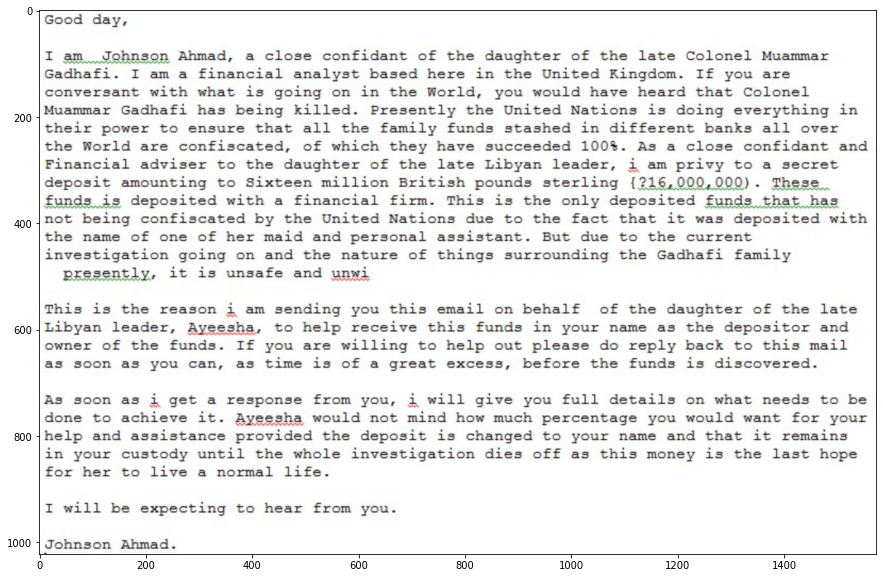

In [50]:
# Read image from which text needs to be extracted
img = read_img("scam.png")

In [38]:
gray = get_grayscale(img)
thresh = thresholding(gray)
opening_img = opening(gray)
canny_img = canny(gray)

# Adding custom options
custom_config = r'--oem 3 --psm 6'
print(pytesseract.image_to_string(opening_img, config=custom_config))

Good day,

I am Jobnson Ahmad, a close confidant of the daughter of the late Colonel Muammar
Gadhafi. I am a financial analyst based here in the United Kingdom. If you are
conversant with what is going on in the World, you would have heard that Colonel
Muammar Gadhafi has being killed. Presently the United Mations is doing everything in
their power to ensure that all the family funds stashed in different banks all over
the World are confiscated, of which they have succeeded 100%. As a close confidant and
Financial adviser to the daughter of the late Libyan leader, ij am privy to a secret
deposit amounting to Sixteen million British pounds sterling {716,000,000). These
funds is deposited with a financial firm. This is the only deposited funds that has
not being confiscated by the United Mations due to the fact that it was deposited with
the name of one of her maid and personal assistant. But due to the current
investigation going on and the nature of things surrounding the Gadhafi famil

# Text detection


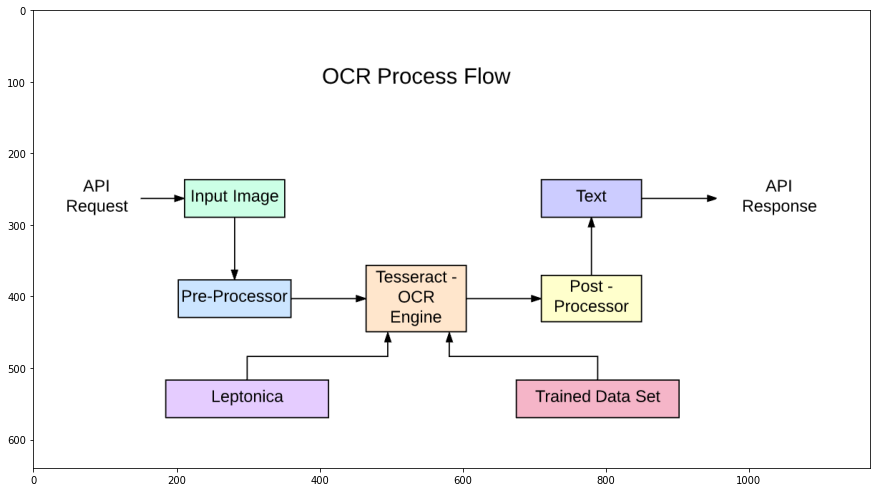

OCR Process Flow
API API
Request Input Image Response
Tesseract -
Post -
Engine
Trained Data Set



In [108]:
img = read_img("ocr_flow.png")
gray = get_grayscale(img)
thresh = thresholding(gray)

print(pytesseract.image_to_string(thresh, config=custom_config))

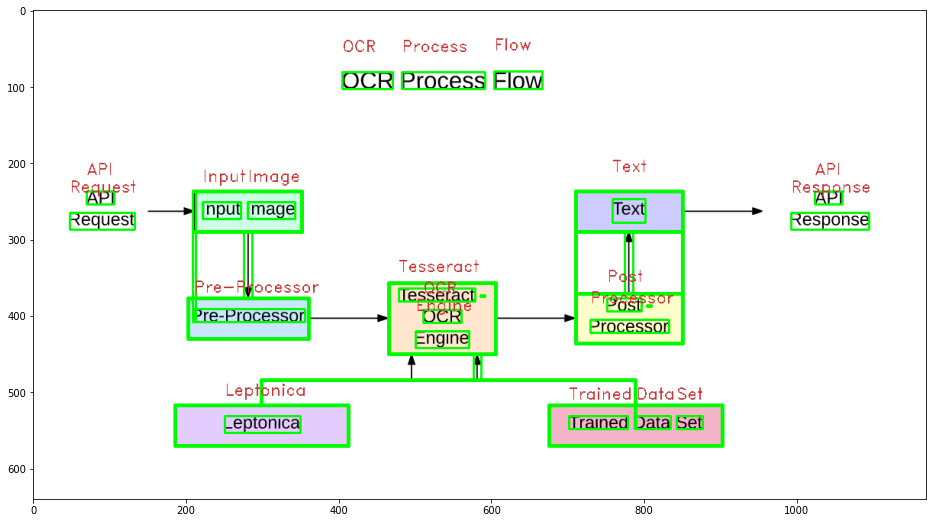

In [109]:
d = pytesseract.image_to_data(thresh, output_type=Output.DICT)

n_boxes = len(d['text'])
for i in range(n_boxes):
    # condition to only pick boxes with a confidence > 60%
    if float(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 250, 0), 2)
        text = d['text'][i].strip()
        if len(text) > 1:
            image = cv2.putText(img, text, (x, y - h - 5), cv2.FONT_HERSHEY_DUPLEX, 0.7, (50,50,200), 1)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.show()

# Rotation

In [144]:
from scipy import ndimage

In [151]:
def rotate(file, show=False):
    image = read_img(file, show)
    angle= 360 - int(re.search('(?<=Rotate: )\d+', pytesseract.image_to_osd('../img/'+file)).group(0))
    return ndimage.rotate(image, angle)



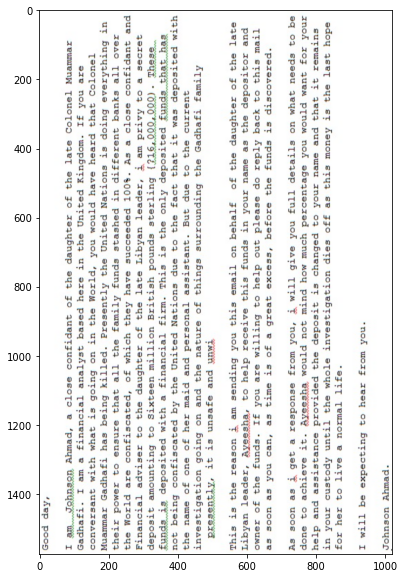

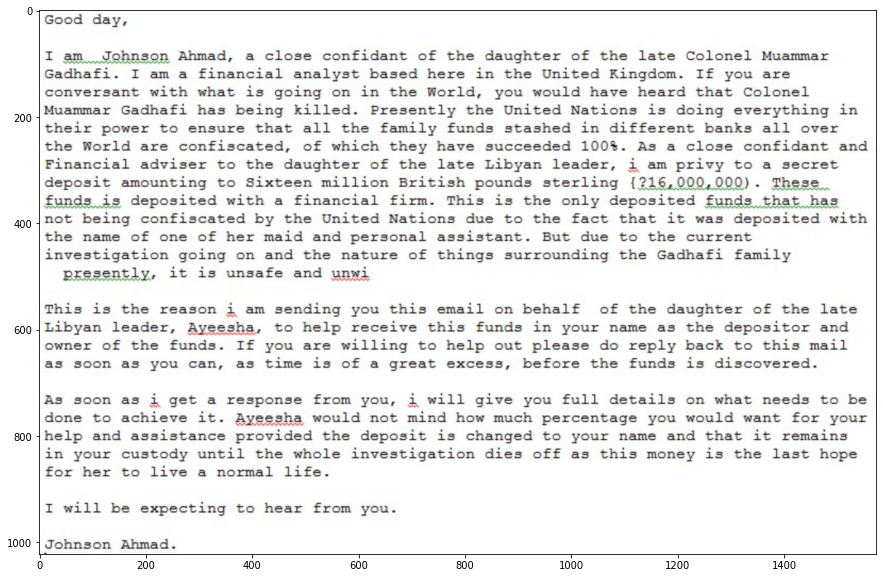

In [152]:
rotated_img = rotate("rotated.png", show=True)
b,g,r = cv2.split(rotated_img)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(15,10))
plt.imshow(rgb_img)
plt.show()

In [156]:
img = prepro_pipeline(rotate("rotated.png"))
print(pytesseract.image_to_string(img, config=custom_config))

Good day,
I am Johnson Ahmad, a close confidant of the daughter of the late Colonel Muammar
Gadhafi. I am a financial analyst based here in the United Kingdom. If you are
conversant with what is going on in the World, you would have heard that Colonel
Muammar Gadhafi has being killed. Presently the United Nations is doing everything in
their power to ensure that all the family funds stashed in different banks all over
the World are confiscated, of which they have succeeded 100%. As a close confidant and
Financial adviser to the daughter of the late Libyan leader, i am privy to a secret
deposit amounting to Sixteen million British pounds sterling {2?16,000,000). These
funds is deposited with a financial firm. This is the only deposited funds that has
not being confiscated by the United Nations due to the fact that it was deposited with
the name of one cof her maid and personal assistant. But due to the current
investigation going on and the nature of things surrounding the Gadhafi famil

In [157]:
img = prepro_pipeline(rotate("scam.png"))
print(pytesseract.image_to_string(img, config=custom_config))

Good day,
I am Johnson Ahmad, a close confidant of the daughter of the late Colonel Muammar
Gadhafi. I am a financial analyst based here in the United Kingdom. If you are
conversant with what is going on in the World, you would have heard that Colonel
Muammar Gadhafi has being killed. Presently the United Nations is doing everything in
their power to ensure that all the family funds stashed in different banks all over
the World are confiscated, of which they have succeeded 100%. As a close confidant and
Financial adviser to the daughter of the late Libyan leader, i am privy to a secret
deposit amounting to Sixteen million British pounds sterling {2?16,000,000). These
funds is deposited with a financial firm. This is the only deposited funds that has
not being confiscated by the United Nations due to the fact that it was deposited with
the name of one cof her maid and personal assistant. But due to the current
investigation going on and the nature of things surrounding the Gadhafi famil

# Natural scene

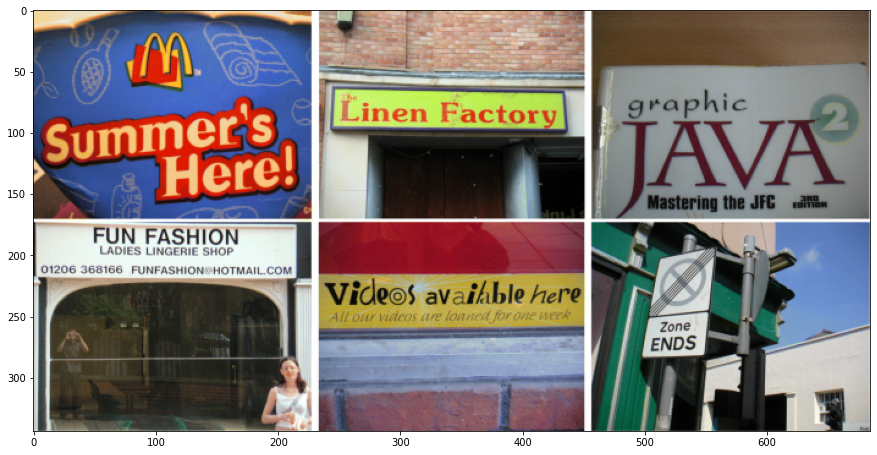

oh ee ag
©) i (ease =| “
_ ‘ce Baphic
mere! | JAVA
su Here! |} i.
etn Mastering the JC afte
| | Videos avathble here (Z| i)
fa| ——— [a ee
—————
heey. —1/)) | ‘



In [53]:
img = read_img("natural_scenes.png")
gray = get_grayscale(img)
thresh = thresholding(gray)
opening_img = opening(gray)
canny_img = canny(gray)

print(pytesseract.image_to_string(img, config=custom_config))